In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
exp1_df = pd.read_csv('./csv/experimet1.csv', sep=';')

In [3]:
exp1_df

,Pressure,Voltage,Current
0,1.0,0.8815,0.004007
1,1.0,0.8780,0.003991
2,15.0,2.2000,0.010000
3,20.5,2.5320,0.011509
4,30.0,3.1200,0.014182
5,40.0,3.6550,0.016614
6,46.0,4.0800,0.018545


In [4]:
exp2_df = pd.read_csv('./csv/experimet2.csv', sep=';')

In [5]:
exp2_df

,Pressure,Voltage,Current
0,1,0.878,0.003991
1,20,2.450,0.011136
2,30,3.040,0.013818
3,35,3.360,0.015273
4,45,3.990,0.018136


In [6]:
exp3_df = pd.read_csv('./csv/experimet3.csv', sep=';')

In [7]:
exp3_df

,Pressure,Voltage,Current
0,1,0.880,0.0040
1,11,1.848,0.0084


In [8]:
def process_data(df):
    P = df['Pressure'].values.reshape(-1, 1)
    C = df['Current'].values.reshape(-1, 1)
    
    # Регрессионное моделирование
    model = LinearRegression().fit(P, C)
    k = model.coef_[0][0]
    b = model.intercept_[0]
    
    # Коэффициент детерминации
    R2 = model.score(P, C)
    
    # Расчет корня среднеквадратической ошибки RMSE предсказанных значений и фактических
    С_pred = model.predict(P)
    RMSE = np.sqrt(np.mean((C - С_pred) ** 2))   

    # Расчет корня среднеквадратической ошибки RMSE теоретических значений и фактических
    C_theoretical = P*(16/59.22)/1000 + 0.004
    RMSE_teoretical = np.sqrt(np.mean((C - C_theoretical) ** 2))
    
    return k, b, R2, RMSE, RMSE_teoretical

Обработка данных из всех датафреймов

In [9]:
results = []
for index, df in enumerate([exp1_df, exp2_df, exp3_df], start=1):
    k, b, R2, RMSE, RMSE_teoretical = process_data(df)
    results.append((index, k, b, R2, RMSE, RMSE_teoretical))

Вывод результатов

In [10]:
for index, k, b, R2, RMSE, RMSE_teoretical in results:
    print(f"Эксперимент {index}: k={k:.4f}, b={b:.4f}, R2={R2:.4f}, RMSE={RMSE:.4f}, RMSE_теорю={RMSE_teoretical:.4f}")

Эксперимент 1: k=0.0003, b=0.0042, R2=0.9872, RMSE=0.0006, RMSE_теорю=0.0017
Эксперимент 2: k=0.0003, b=0.0041, R2=0.9936, RMSE=0.0004, RMSE_теорю=0.0016
Эксперимент 3: k=0.0004, b=0.0036, R2=1.0000, RMSE=0.0000, RMSE_теорю=0.0010


Функция для построения графика

In [11]:
def plot_experiment(df, k, b, R2, RMSE, RMSE_teoretical, index):
    plt.scatter(df['Pressure'], df['Current'], label='Измеренные данные')
    plt.plot(df['Pressure'], df['Pressure']*k + b, color='red', label='Линейная регрессия')
    plt.plot(df['Pressure'], df['Pressure']*(16/59.22)/1000 + 0.004, color='green', label='Теоретические значения')
    plt.xlabel('Давление, атм.')
    plt.ylabel('Ток, mA')
    plt.title(f'Измерение давления датчиком РТМ-M эксперимент №{index}')
    plt.text(0.05, 0.95, f'k = {k:.6f}\nb = {b:.6f}\nR² = {R2:.4f}\nRMSE = {RMSE:.6f}\nRMSE_теор. = {RMSE_teoretical:.6f}',
             transform=plt.gca().transAxes,
             verticalalignment='top')
    plt.legend()
    plt.show()

Построение графиков для всех экспериментов

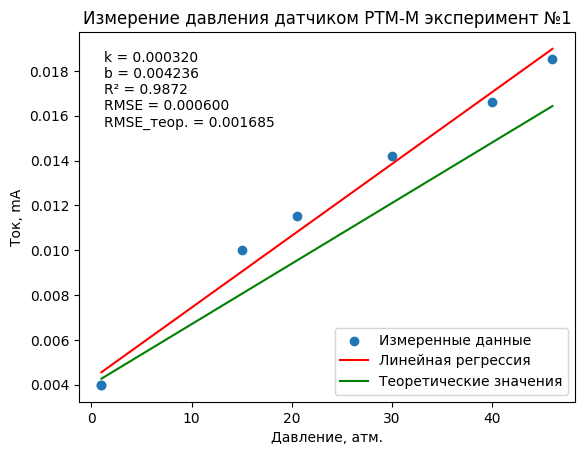

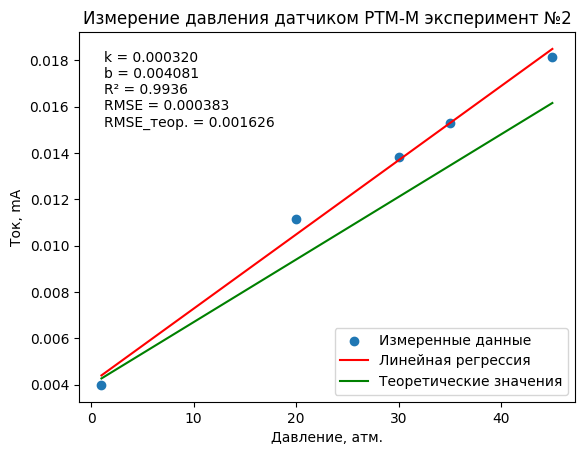

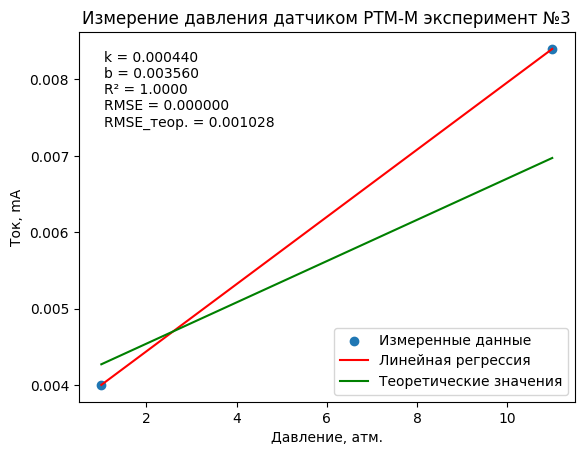

In [12]:
for index, df in enumerate([exp1_df, exp2_df, exp3_df], start=1):
    k, b, R2, RMSE, RMSE_teoretical = results[index-1][1:6] 
    plot_experiment(df, k, b, R2, RMSE, RMSE_teoretical, index)

Определение общих коэффициентов для всех измеренных значений

In [17]:
combined_data = pd.concat([exp1_df, exp2_df, exp3_df], ignore_index=True)

In [18]:
k, b, R2, RMSE, RMSE_teoretical = process_data(combined_data)

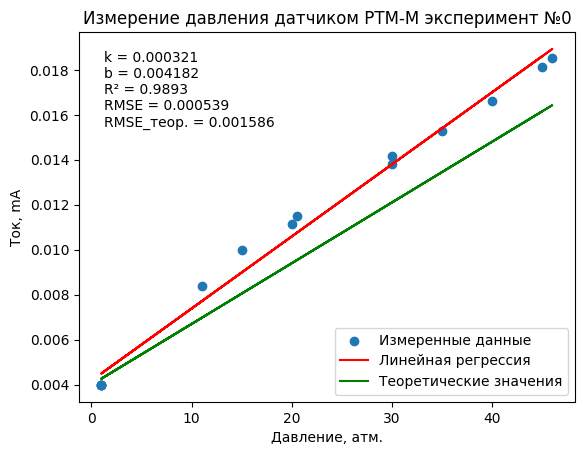

In [19]:
plot_experiment(combined_data, k, b, R2, RMSE, RMSE_teoretical, 0)